In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
 

In [2]:
df1 = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)
df2 = pd.read_csv('accidents_2009_to_2011.csv', low_memory=False)
df = pd.concat([df1, df2], axis = 0)


In [3]:
import pandas as pd

df = pd.DataFrame(df)

# Verisetinin rastgele %80'ini silmek (%20'sini tutmak)
df = df.sample(frac=0.2, random_state=1).reset_index(drop=True)

print(df)

       Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       200501MM70932               534110.0                176700.0   
1            2.01E+12               415870.0                416790.0   
2            2.01E+12               394070.0                575960.0   
3            2.01E+12               349100.0                636240.0   
4       2011160B04681               496160.0                408670.0   
...               ...                    ...                     ...   
207886  200920D019702               408590.0                293100.0   
207887    2.01044E+12               465100.0                100580.0   
207888    2.01135E+12               526620.0                259800.0   
207889  200906A024033               383760.0                398560.0   
207890  200706J069437               389320.0                390530.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.070404  51.473321             1                  3   
1    

In [4]:
import pandas as pd

df = pd.DataFrame(df)

# Verisetinin rastgele %80'ini silmek (%20'sini tutmak)
df = df.sample(frac=0.6, random_state=1).reset_index(drop=True)

print(df)

       Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0            2.01E+12               430690.0                286050.0   
1       200611AA20790               422220.0                532490.0   
2       200645GU92125               500550.0                150400.0   
3       200650D21L924               296800.0                 91270.0   
4       200901ZD31043               530920.0                161640.0   
...               ...                    ...                     ...   
124730  20114100C1024               510520.0                196980.0   
124731  201101QA10234               517410.0                190580.0   
124732  200901GD10232               534930.0                184650.0   
124733       2.01E+12               318340.0                178010.0   
124734    2.00946E+12               604120.0                159870.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -1.549633  52.471497            23                  3   
1    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124735 entries, 0 to 124734
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               124735 non-null  object 
 1   Location_Easting_OSGR                        124728 non-null  float64
 2   Location_Northing_OSGR                       124728 non-null  float64
 3   Longitude                                    124728 non-null  float64
 4   Latitude                                     124728 non-null  float64
 5   Police_Force                                 124735 non-null  int64  
 6   Accident_Severity                            124735 non-null  int64  
 7   Number_of_Vehicles                           124735 non-null  int64  
 8   Number_of_Casualties                         124735 non-null  int64  
 9   Date                                         124735 non-nul

In [6]:
#s
# Silinecek sütunlar
columns_to_drop = [
    '2nd_Road_Number', 
    'Pedestrian_Crossing-Physical_Facilities',
    'Local_Authority_(Highway)', 
    'LSOA_of_Accident_Location'
]
# Veri setinden sütunları kalıcı olarak kaldır
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
#s
df = pd.DataFrame(df)

# 'Accident_Severity' kategorisi 1'i silme
df = df[df['Accident_Severity'] != 1]

# Kategorilerin isimlerini değiştirme
df['Accident_Severity'] = df['Accident_Severity'].replace({3: 1, 2: 2})

print(df)

       Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0            2.01E+12               430690.0                286050.0   
1       200611AA20790               422220.0                532490.0   
2       200645GU92125               500550.0                150400.0   
3       200650D21L924               296800.0                 91270.0   
4       200901ZD31043               530920.0                161640.0   
...               ...                    ...                     ...   
124730  20114100C1024               510520.0                196980.0   
124731  201101QA10234               517410.0                190580.0   
124732  200901GD10232               534930.0                184650.0   
124733       2.01E+12               318340.0                178010.0   
124734    2.00946E+12               604120.0                159870.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -1.549633  52.471497            23                  1   
1    

In [8]:
df.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               7
Location_Northing_OSGR                              7
Longitude                                           7
Latitude                                            7
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               11
Local_Authority_(District)                          0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                122989
Junction_Control            

In [9]:
# Eksik veri yüzdelerini hesapla  
missing_percentage = (df.isnull().sum() / df.shape[0] * 100).round(5)
print(missing_percentage)

Accident_Index                                   0.00000
Location_Easting_OSGR                            0.00569
Location_Northing_OSGR                           0.00569
Longitude                                        0.00569
Latitude                                         0.00569
Police_Force                                     0.00000
Accident_Severity                                0.00000
Number_of_Vehicles                               0.00000
Number_of_Casualties                             0.00000
Date                                             0.00000
Day_of_Week                                      0.00000
Time                                             0.00894
Local_Authority_(District)                       0.00000
1st_Road_Class                                   0.00000
1st_Road_Number                                  0.00000
Road_Type                                        0.00000
Speed_limit                                      0.00000
Junction_Detail                

In [10]:
# Silinecek sütunlar
columns_to_drop = [
    'Junction_Detail', 
    'Special_Conditions_at_Site', 
    'Carriageway_Hazards', 
    'Junction_Control',
    'Accident_Index',
    'Date'
]
# Veri setinden sütunları kalıcı olarak kaldır
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122989 entries, 0 to 124734
Data columns (total 23 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        122982 non-null  float64
 1   Location_Northing_OSGR                       122982 non-null  float64
 2   Longitude                                    122982 non-null  float64
 3   Latitude                                     122982 non-null  float64
 4   Police_Force                                 122989 non-null  int64  
 5   Accident_Severity                            122989 non-null  int64  
 6   Number_of_Vehicles                           122989 non-null  int64  
 7   Number_of_Casualties                         122989 non-null  int64  
 8   Day_of_Week                                  122989 non-null  int64  
 9   Time                                         122978 non-null  ob

In [12]:
df.shape

(122989, 23)

In [13]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,...,Road_Type,Speed_limit,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,430690.0,286050.0,-1.549633,52.471497,23,1,2,1,6,15:10,...,Dual carriageway,70,-1,None within 50 metres,Daylight: Street light present,Fine without high winds,Dry,2,Yes,2005
1,422220.0,532490.0,-1.656839,54.686988,11,1,2,2,3,00:05,...,Single carriageway,60,-1,None within 50 metres,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes,2006
2,500550.0,150400.0,-0.560859,51.243865,45,2,1,2,4,09:20,...,Single carriageway,30,6,None within 50 metres,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2006
3,296800.0,91270.0,-3.463090,50.711808,50,1,2,1,2,13:05,...,Roundabout,60,6,None within 50 metres,Daylight: Street light present,Fine without high winds,Dry,2,Yes,2006
4,530920.0,161640.0,-0.121863,51.338725,1,1,2,2,3,12:45,...,Single carriageway,30,6,None within 50 metres,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes,2009


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122989 entries, 0 to 124734
Data columns (total 23 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        122982 non-null  float64
 1   Location_Northing_OSGR                       122982 non-null  float64
 2   Longitude                                    122982 non-null  float64
 3   Latitude                                     122982 non-null  float64
 4   Police_Force                                 122989 non-null  int64  
 5   Accident_Severity                            122989 non-null  int64  
 6   Number_of_Vehicles                           122989 non-null  int64  
 7   Number_of_Casualties                         122989 non-null  int64  
 8   Day_of_Week                                  122989 non-null  int64  
 9   Time                                         122978 non-null  ob

In [15]:
df.isnull().sum()

Location_Easting_OSGR                            7
Location_Northing_OSGR                           7
Longitude                                        7
Latitude                                         7
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Day_of_Week                                      0
Time                                            11
Local_Authority_(District)                       0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
Pedestrian_Crossing-Human_Control                2
Light_Conditions                                 0
Weather_Conditions                              19
Road_Surface_Conditions        

In [16]:
df['Location_Easting_OSGR'].value_counts()

Location_Easting_OSGR
531170.0    30
530980.0    28
530970.0    26
531180.0    24
532550.0    24
            ..
644800.0     1
294730.0     1
362840.0     1
298730.0     1
604120.0     1
Name: count, Length: 37283, dtype: int64

In [17]:
df['Location_Northing_OSGR'].value_counts()

Location_Northing_OSGR
181170.0    34
181310.0    32
179660.0    31
181120.0    31
181290.0    29
            ..
339810.0     1
108180.0     1
598380.0     1
552420.0     1
196980.0     1
Name: count, Length: 44315, dtype: int64

In [18]:
df['Longitude'].value_counts()

Longitude
-0.977611    11
-3.310596     8
-1.874681     7
-1.192286     7
-0.958895     6
             ..
-3.084185     1
-2.447605     1
-0.290893     1
-1.617387     1
 0.926803     1
Name: count, Length: 116335, dtype: int64

In [19]:
df['Latitude'].value_counts()

Latitude
52.949719    11
52.473456     8
51.506693     8
52.955058     7
52.498732     6
             ..
50.449522     1
51.818257     1
55.610375     1
55.948184     1
51.301283     1
Name: count, Length: 115304, dtype: int64

In [20]:
# Eksik değerleri bir önceki değerle doldur
df['Location_Easting_OSGR'] = df['Location_Easting_OSGR'].ffill()
df['Location_Northing_OSGR'] = df['Location_Northing_OSGR'].ffill()
df['Longitude'] = df['Longitude'].ffill()
df['Latitude'] = df['Latitude'].ffill()

In [21]:
df['Time'] = df['Time'].ffill()


In [22]:
def categorize_time(time):
    hour = int(time.split(':')[0])  # Saat kısmını al
    if 0 <= hour < 6:
        return 0
    elif 6 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    else:
        return 3

df['Time'] = df['Time'].apply(categorize_time)

df['Time'].value_counts()  

Time
2    52609
1    33860
3    29530
0     6990
Name: count, dtype: int64

In [23]:
df.isnull().sum()

Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_(District)                       0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
Pedestrian_Crossing-Human_Control                2
Light_Conditions                                 0
Weather_Conditions                              19
Road_Surface_Conditions        

In [24]:
df['Weather_Conditions'].value_counts()

Weather_Conditions
Fine without high winds       98096
Raining without high winds    14426
Other                          3020
Unknown                        2392
Raining with high winds        1611
Fine with high winds           1591
Snowing without high winds      994
Fog or mist                     694
Snowing with high winds         146
Name: count, dtype: int64

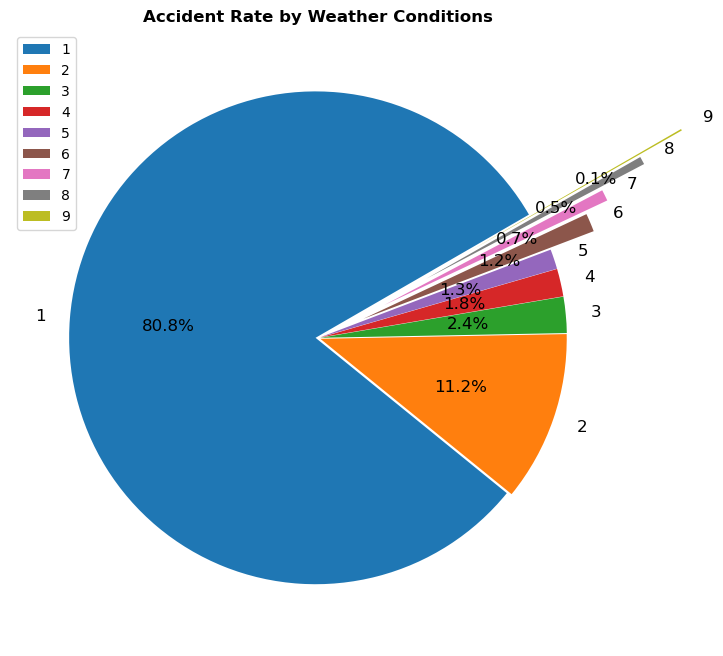

In [184]:
weather_cond = df["Weather_Conditions"].value_counts()
weather_cond_arr = df["Weather_Conditions"].unique()
weather_acc_num_arr = weather_cond.values

plt.figure(figsize = (20, 8))

plt.pie(weather_acc_num_arr, labels = weather_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%")
plt.title("Accident Rate by Weather Conditions",weight="bold")
plt.legend()

In [25]:
df['Weather_Conditions'] = df['Weather_Conditions'].ffill()

In [26]:
mapping = {
    "Fine without high winds": 1,
    "Raining without high winds": 2,
    "Other": 3,
    "Unknown": 4,
    "Raining with high winds": 5,
    "Fine with high winds": 6,
    "Snowing without high winds": 7,
    "Fog or mist": 8,
    "Snowing with high winds": 9
}
df['Weather_Conditions'] = df['Weather_Conditions'].map(mapping)


In [27]:
df.isnull().sum()

Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_(District)                       0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
Pedestrian_Crossing-Human_Control                2
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [28]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].describe()

count     122639
unique         2
top          Yes
freq       98940
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: object

In [29]:
# Eksik değerlerin oranını kontrol etme
missing_ratio = df['Did_Police_Officer_Attend_Scene_of_Accident'].isnull().mean()
print(f"Eksik değer oranı: {missing_ratio:.2%}")

Eksik değer oranı: 0.28%


In [30]:
 # Eksik değerleri mod (en sık kullanılan değer) ile doldurma
mode_value = df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()[0]
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(mode_value)
# 'Yes' ve 'No' değerlerini 1 ve 0'a dönüştürme
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].map({'Yes': 1, 'No': 0})


In [31]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].head()

0    1
1    1
2    1
3    1
4    1
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [32]:
df.isnull().sum()

Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_(District)                       0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
Pedestrian_Crossing-Human_Control                2
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [33]:
df['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                          84483
Wet/Damp                     34565
Frost/Ice                     2753
Snow                           915
Flood (Over 3cm of water)      133
Name: count, dtype: int64

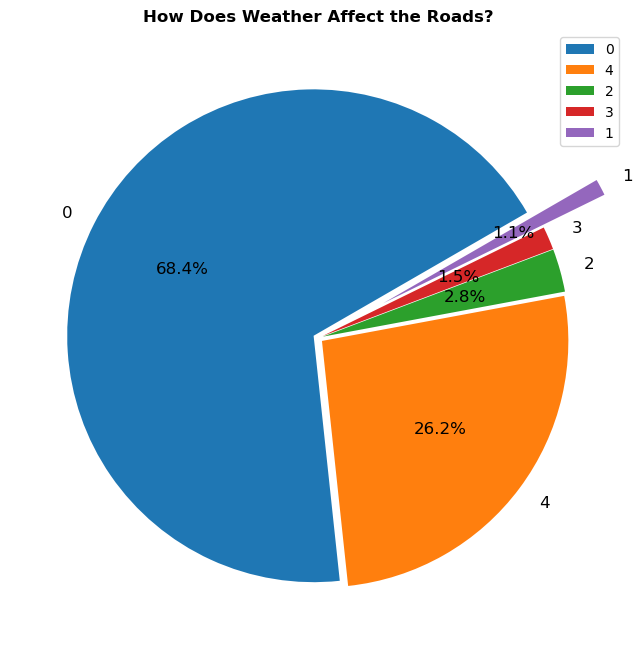

In [182]:
road_cond = df["Road_Surface_Conditions"].value_counts()
road_cond_arr = df["Road_Surface_Conditions"].unique()
road_acc_num_arr = road_cond.values

plt.figure(figsize = (20, 8))

plt.pie(road_acc_num_arr, labels = road_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.02,0.02,0.02,0.02,0.3),autopct="%1.1f%%")
plt.title("How Does Weather Affect the Roads?",weight="bold")
plt.legend()

In [34]:
# Eksik değerleri bir önceki değerle doldur
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].ffill()

In [35]:
# LabelEncoder'ı oluştur
label_encoder = LabelEncoder()

# 'Pedestrian_Crossing-Physical_Facilities' sütununu dönüştür
df['Road_Surface_Conditions'] = label_encoder.fit_transform(df['Road_Surface_Conditions'])

# Değer sayılarını yazdır
print(df['Road_Surface_Conditions'].value_counts())

Road_Surface_Conditions
0    84585
4    34600
2     2756
3      915
1      133
Name: count, dtype: int64


In [36]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
Pedestrian_Crossing-Human_Control              2
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Urban_or_Rural_Area 

In [37]:
df.to_csv('veri_seti.csv', index=False)

In [38]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
Pedestrian_Crossing-Human_Control              2
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Urban_or_Rural_Area 

In [39]:
df['Pedestrian_Crossing-Human_Control'].value_counts() 

Pedestrian_Crossing-Human_Control
None within 50 metres                 122219
Control by other authorised person       460
Control by school crossing patrol        308
Name: count, dtype: int64

In [40]:
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].bfill()

In [41]:
 # LabelEncoder'ı oluştur
label_encoder = LabelEncoder()

# 'Pedestrian_Crossing-Physical_Facilities' sütununu dönüştür
df['Pedestrian_Crossing-Human_Control'] = label_encoder.fit_transform(df['Pedestrian_Crossing-Human_Control'])

# Değer sayılarını yazdır
print(df['Pedestrian_Crossing-Human_Control'].value_counts())


Pedestrian_Crossing-Human_Control
2    122221
0       460
1       308
Name: count, dtype: int64


In [42]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
Pedestrian_Crossing-Human_Control              0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Urban_or_Rural_Area 

In [43]:
df.to_csv('veri_seti.csv', index=False)

In [44]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
Pedestrian_Crossing-Human_Control              0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Urban_or_Rural_Area 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122989 entries, 0 to 124734
Data columns (total 23 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        122989 non-null  float64
 1   Location_Northing_OSGR                       122989 non-null  float64
 2   Longitude                                    122989 non-null  float64
 3   Latitude                                     122989 non-null  float64
 4   Police_Force                                 122989 non-null  int64  
 5   Accident_Severity                            122989 non-null  int64  
 6   Number_of_Vehicles                           122989 non-null  int64  
 7   Number_of_Casualties                         122989 non-null  int64  
 8   Day_of_Week                                  122989 non-null  int64  
 9   Time                                         122989 non-null  in

In [46]:
df['Road_Type'].value_counts() 

Road_Type
Single carriageway    91880
Dual carriageway      18313
Roundabout             8147
One way street         2621
Slip road              1226
Unknown                 802
Name: count, dtype: int64

In [47]:
 # LabelEncoder'ı oluştur
label_encoder = LabelEncoder()

# 'Pedestrian_Crossing-Physical_Facilities' sütununu dönüştür
df['Road_Type'] = label_encoder.fit_transform(df['Road_Type'])

# Değer sayılarını yazdır
print(df['Road_Type'].value_counts())

Road_Type
3    91880
0    18313
2     8147
1     2621
4     1226
5      802
Name: count, dtype: int64


In [48]:
df['Light_Conditions'].value_counts() 

Light_Conditions
Daylight: Street light present               90207
Darkness: Street lights present and lit      24310
Darkeness: No street lighting                 6888
Darkness: Street lighting unknown             1093
Darkness: Street lights present but unlit      491
Name: count, dtype: int64

In [49]:
print(df['Light_Conditions'].isnull().sum())

0


In [50]:
 # LabelEncoder'ı oluştur
label_encoder = LabelEncoder()

# 'Pedestrian_Crossing-Physical_Facilities' sütununu dönüştür
df['Light_Conditions'] = label_encoder.fit_transform(df['Light_Conditions'])

# Değer sayılarını yazdır
print(df['Light_Conditions'].value_counts())

Light_Conditions
4    90207
2    24310
0     6888
1     1093
3      491
Name: count, dtype: int64


Location_Easting_OSGR                          0.000494
Location_Northing_OSGR                         0.031054
Longitude                                     -0.000365
Latitude                                       0.030971
Police_Force                                   0.021010
Accident_Severity                              1.000000
Number_of_Vehicles                            -0.091550
Number_of_Casualties                           0.057321
Day_of_Week                                   -0.001600
Time                                           0.003162
Local_Authority_(District)                     0.018902
1st_Road_Class                                 0.002890
1st_Road_Number                                0.000980
Road_Type                                      0.025512
Speed_limit                                    0.046803
2nd_Road_Class                                -0.047909
Pedestrian_Crossing-Human_Control              0.002789
Light_Conditions                              -0

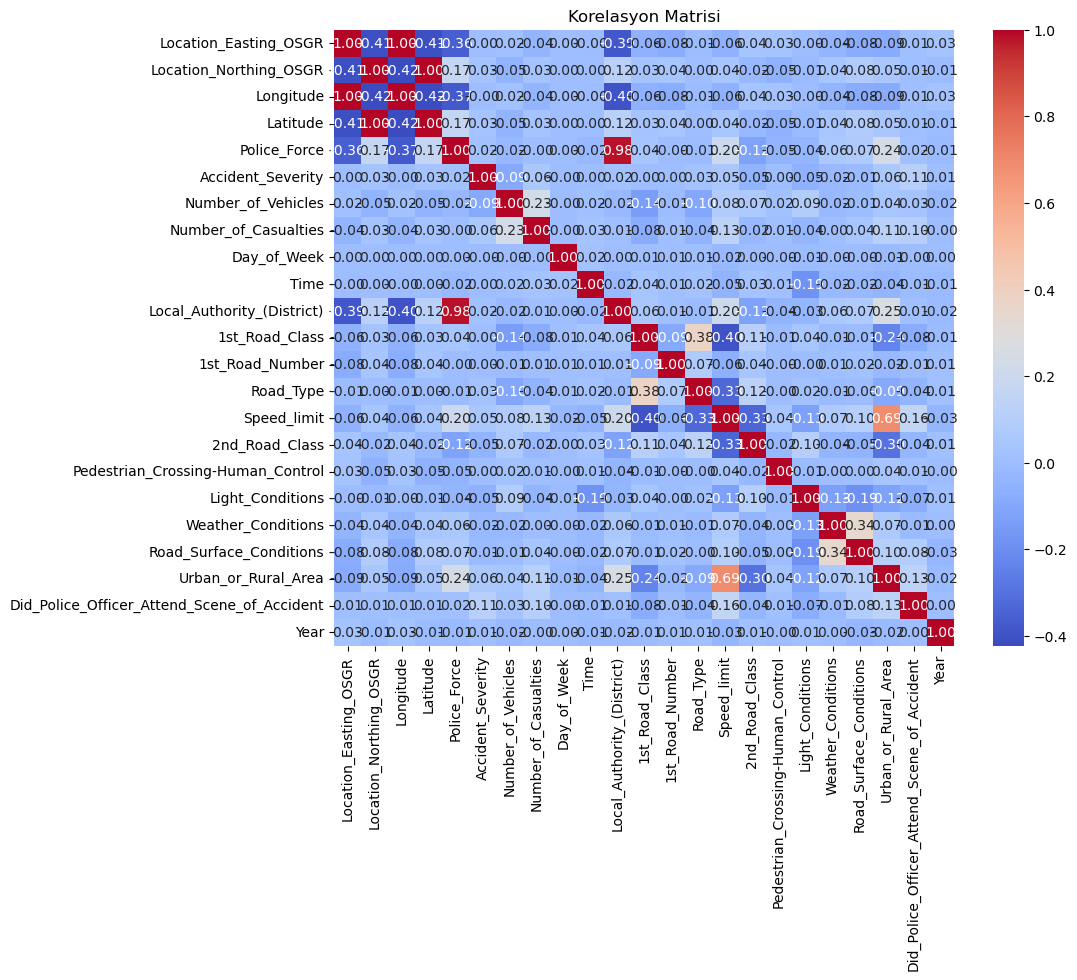

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sayısal değişkenleri seç
numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Korelasyon matrisini hesapla
correlation_matrix = df[numerical_cols].corr()

# Hedef değişkenin diğer sayısal değişkenlerle olan korelasyonunu al
target_correlation = correlation_matrix['Accident_Severity']

# Sonuçları yazdır
print(target_correlation)

# Korelasyon matrisini ısı haritası olarak görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()


In [52]:
df.to_csv('veri_seti.csv', index=False)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122989 entries, 0 to 124734
Data columns (total 23 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        122989 non-null  float64
 1   Location_Northing_OSGR                       122989 non-null  float64
 2   Longitude                                    122989 non-null  float64
 3   Latitude                                     122989 non-null  float64
 4   Police_Force                                 122989 non-null  int64  
 5   Accident_Severity                            122989 non-null  int64  
 6   Number_of_Vehicles                           122989 non-null  int64  
 7   Number_of_Casualties                         122989 non-null  int64  
 8   Day_of_Week                                  122989 non-null  int64  
 9   Time                                         122989 non-null  in

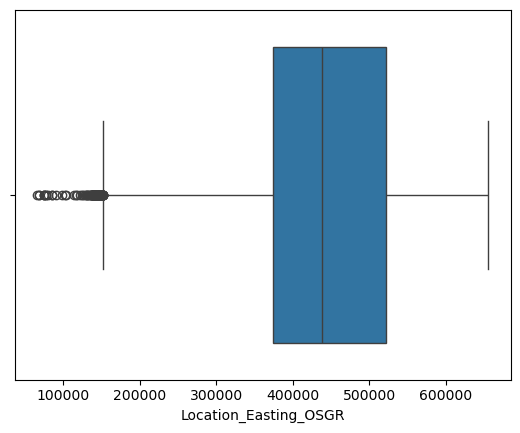

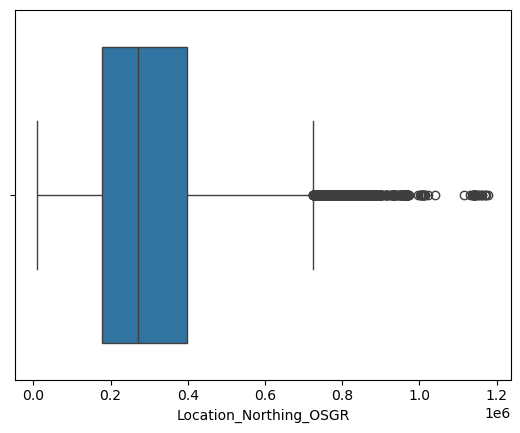

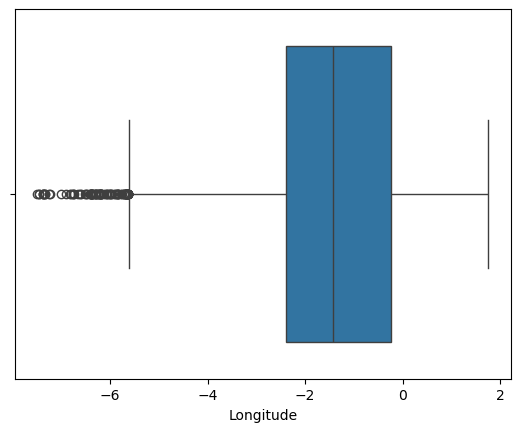

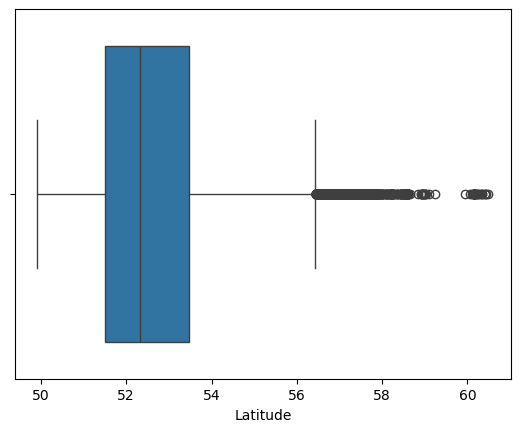

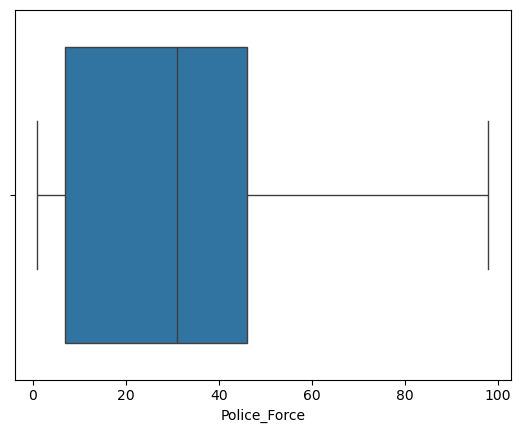

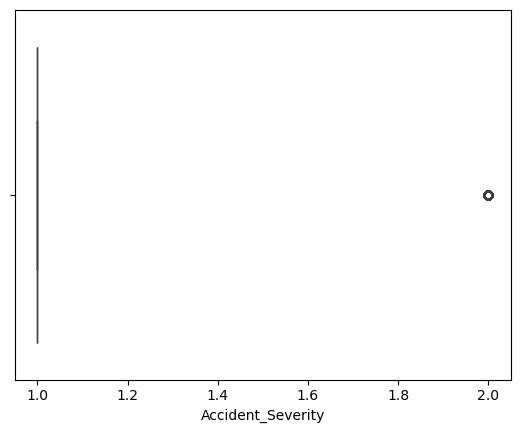

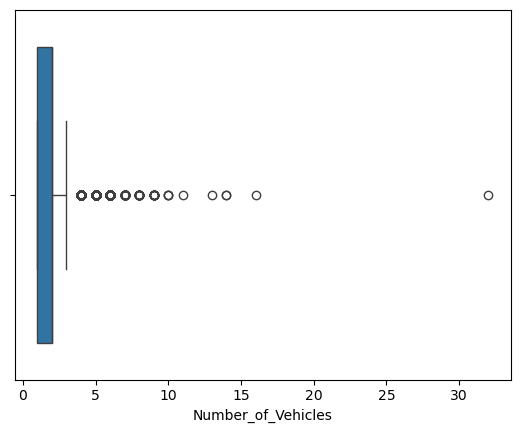

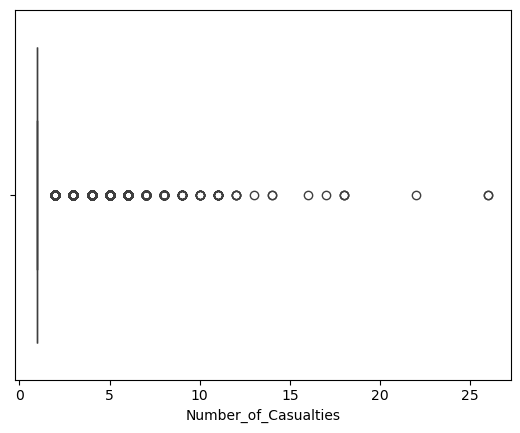

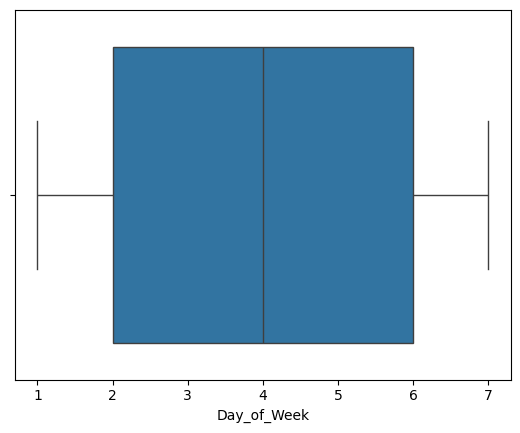

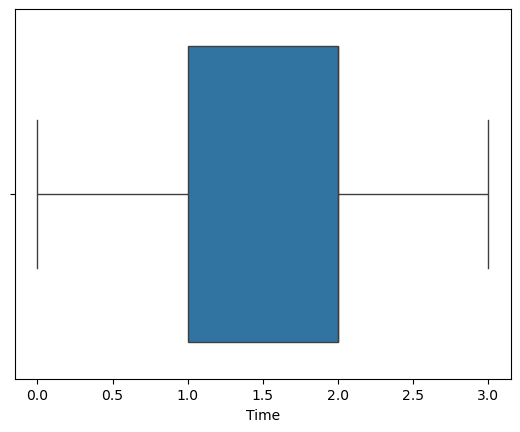

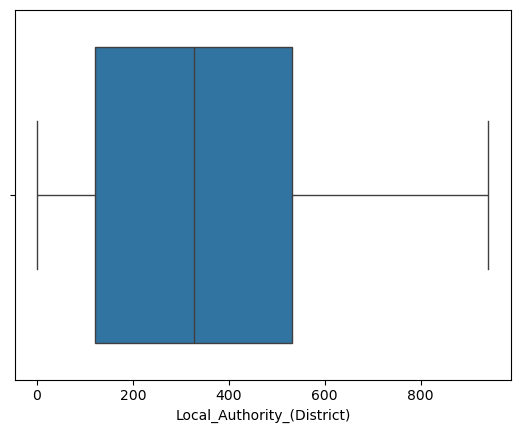

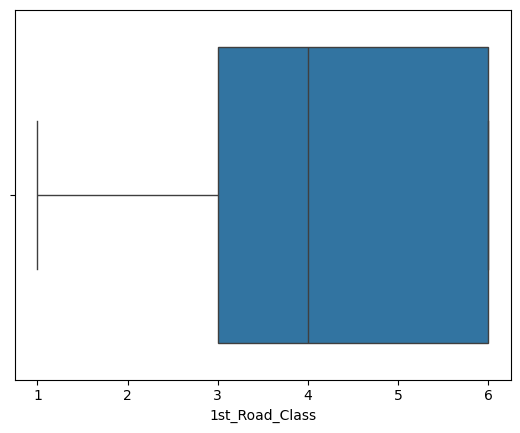

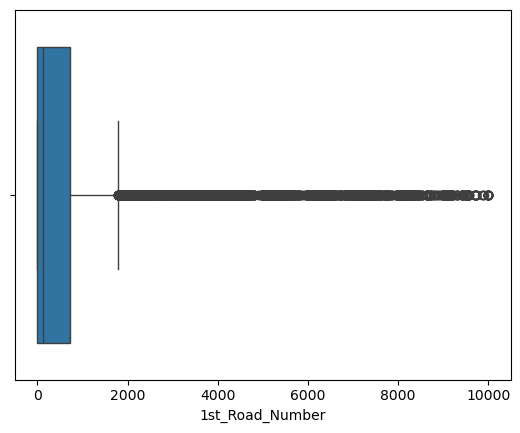

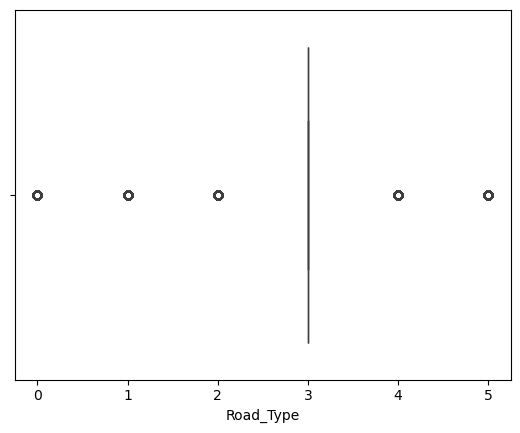

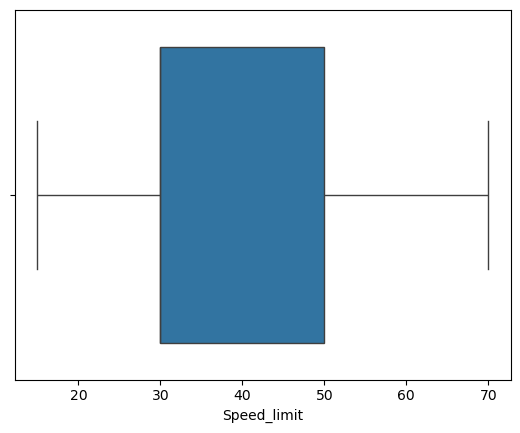

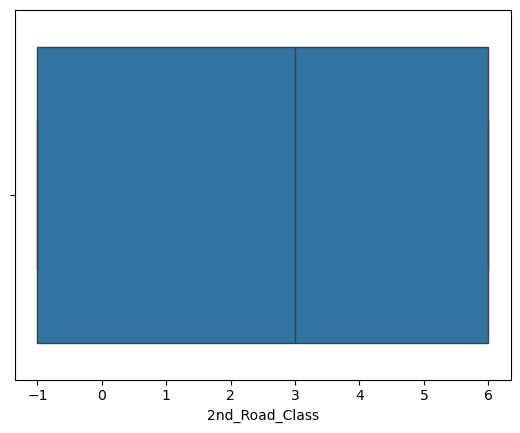

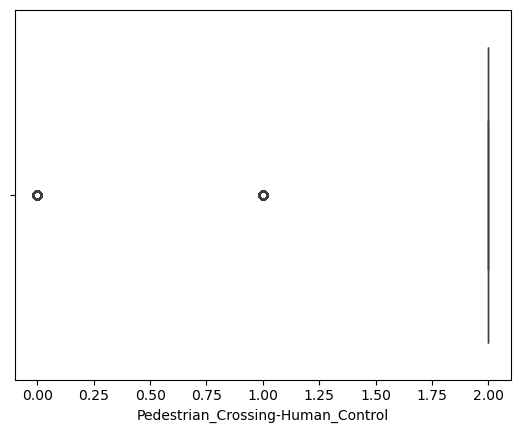

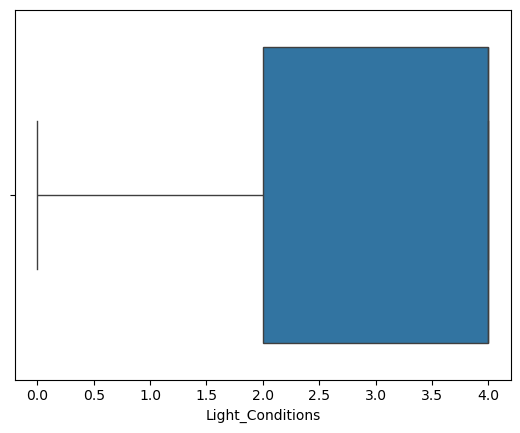

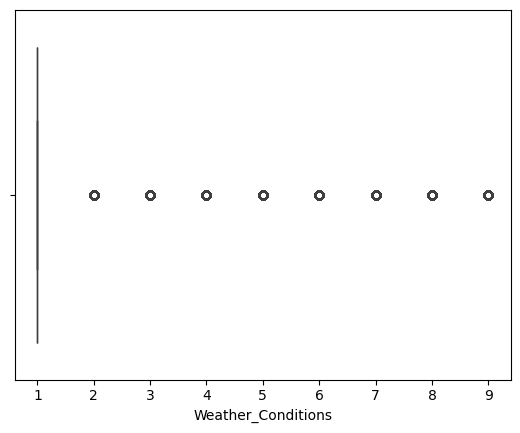

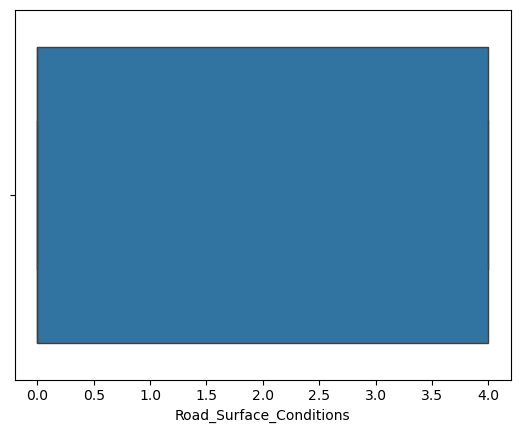

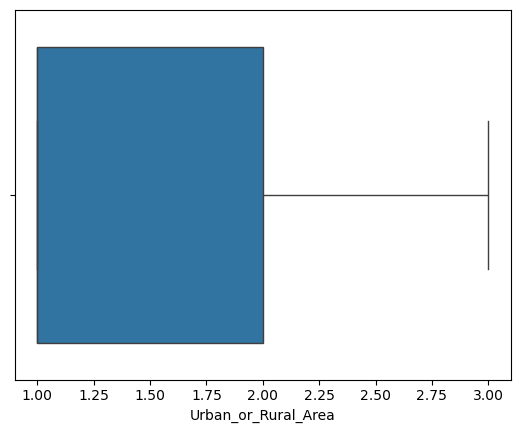

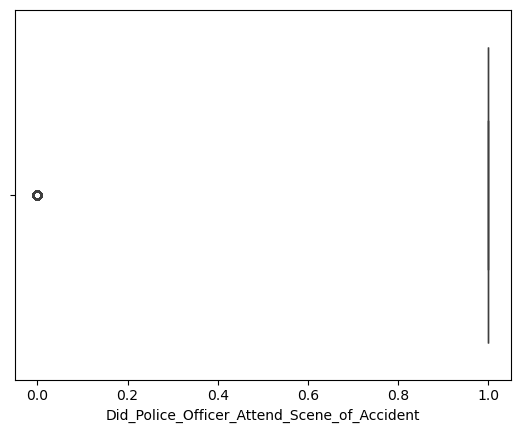

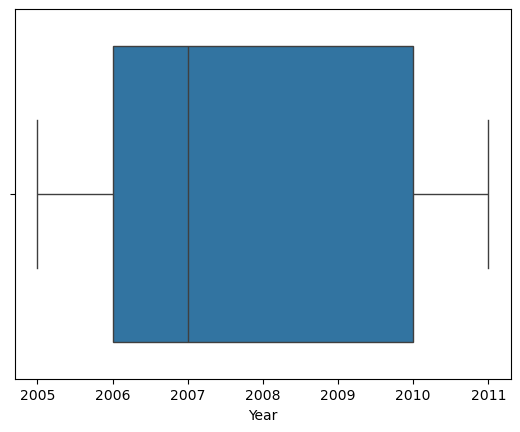

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("veri_seti.csv")
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122989 entries, 0 to 122988
Data columns (total 23 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        122989 non-null  float64
 1   Location_Northing_OSGR                       122989 non-null  float64
 2   Longitude                                    122989 non-null  float64
 3   Latitude                                     122989 non-null  float64
 4   Police_Force                                 122989 non-null  int64  
 5   Accident_Severity                            122989 non-null  int64  
 6   Number_of_Vehicles                           122989 non-null  int64  
 7   Number_of_Casualties                         122989 non-null  int64  
 8   Day_of_Week                                  122989 non-null  int64  
 9   Time                                         122989 non-nul

In [56]:
df['Accident_Severity'].value_counts()

Accident_Severity
1    106420
2     16569
Name: count, dtype: int64

Smote ve undersample uyguladık

In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import pandas as pd

# Örnek veri setini yükleyin
df = pd.read_csv("veri_seti.csv")
# df['Accident_Severity'] hedef sütununu temsil ediyor

# X: Özellikler, y: Etiketler
X = df.drop(columns=["Accident_Severity"])  # Özellikler
y = df["Accident_Severity"]  # Hedef sütun (Accident_Severity)

# Azınlık ve çoğunluk sınıfının sayısını kontrol et
class_counts = Counter(y)
minority_class = min(class_counts, key=class_counts.get)
majority_class = max(class_counts, key=class_counts.get)

print(f"Azınlık sınıfı: {minority_class} ve sayısı: {class_counts[minority_class]}")
print(f"Çoğunluk sınıfı: {majority_class} ve sayısı: {class_counts[majority_class]}")

# SMOTE: Sadece azınlık sınıfını %40 artır
new_minority_count = int(class_counts[minority_class] * 1.4)
oversample = SMOTE(sampling_strategy={minority_class: new_minority_count}, random_state=42)

# RandomUnderSampler: Çoğunluk sınıfı olan 1'i %50 azalt
new_majority_count = int(class_counts[majority_class] * 0.5)
undersample = RandomUnderSampler(sampling_strategy={majority_class: new_majority_count}, random_state=42)

# Pipeline: İlk önce azınlık sınıfını artır, ardından çoğunluk sınıfını %50 azalt
pipeline = Pipeline(steps=[('smote', oversample), ('undersample', undersample)])

# Veriyi yeniden örnekleme işlemi
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Yeni veri setini oluştur
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Accident_Severity'] = y_resampled  # Hedef sütunu ekleme

# Yeni veri setini kaydet
df_resampled.to_csv("one_data.csv", index=False)

# Sonuçları yazdır
print("\nYeni veri sınıf dağılımı:")
print(Counter(y_resampled))

# Veri setinin boyutlarını kontrol edelim
print("\nOrijinal veri boyutu:", X.shape)
print("SMOTE + RandomUnderSampler sonrası veri boyutu:", X_resampled.shape)
print("Veri başarıyla 'one_data.csv' dosyasına kaydedildi!")

Azınlık sınıfı: 2 ve sayısı: 16569
Çoğunluk sınıfı: 1 ve sayısı: 106420

Yeni veri sınıf dağılımı:
Counter({1: 53210, 2: 23196})

Orijinal veri boyutu: (122989, 22)
SMOTE + RandomUnderSampler sonrası veri boyutu: (76406, 22)
Veri başarıyla 'one_data.csv' dosyasına kaydedildi!


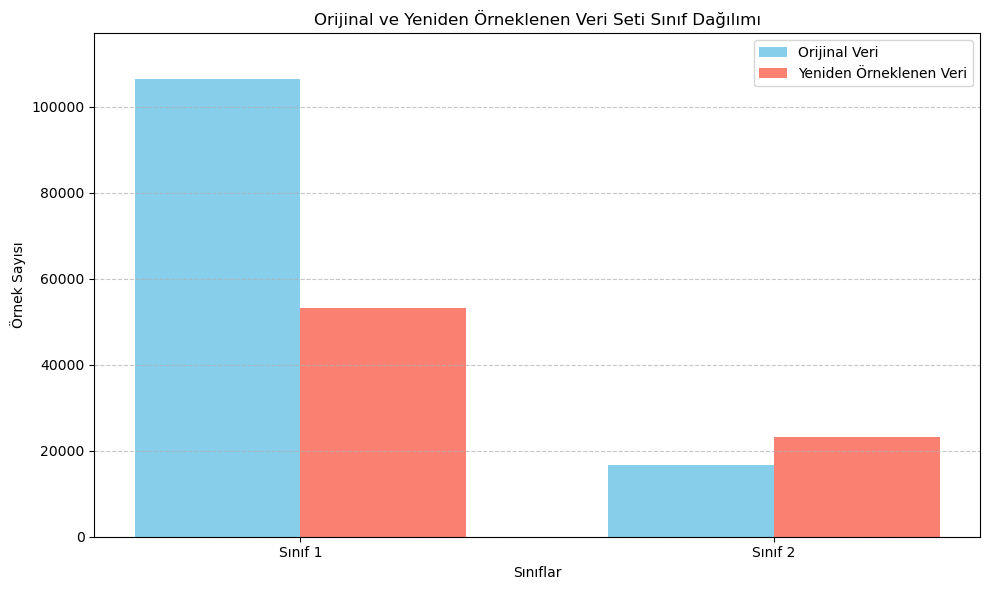

In [59]:
# Orijinal ve yeniden örneklenen sınıf dağılımlarını hazırla
resampled_counts = Counter(y_resampled)
classes = list(class_counts.keys())  # Sınıf isimleri (örneğin: 0, 1)
original_counts = [class_counts[c] for c in classes]
resampled_counts = [resampled_counts[c] for c in classes]

# Grup bar grafikleri için x pozisyonlarını belirle
x = np.arange(len(classes))
width = 0.35  # Bar genişliği

# Grafik oluştur
plt.figure(figsize=(10, 6))

# Orijinal veri seti bar grafiği
plt.bar(x - width / 2, original_counts, width, label="Orijinal Veri", color='skyblue')

# Yeniden örneklenen veri seti bar grafiği
plt.bar(x + width / 2, resampled_counts, width, label="Yeniden Örneklenen Veri", color='salmon')

# Eksen etiketleri, başlık ve x ekseni ayarları
plt.xlabel("Sınıflar")
plt.ylabel("Örnek Sayısı")
plt.title("Orijinal ve Yeniden Örneklenen Veri Seti Sınıf Dağılımı")
plt.xticks(x, [f"Sınıf {c}" for c in classes])  # Sınıf isimlerini ekle
plt.ylim(0, max(max(original_counts), max(resampled_counts)) * 1.1)  # Biraz boşluk bırak

# Lejant ve gösterim
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafik gösterimi
plt.tight_layout()
plt.show()

In [60]:
df_new = pd.read_csv("one_data.csv")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76406 entries, 0 to 76405
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        76406 non-null  float64
 1   Location_Northing_OSGR                       76406 non-null  float64
 2   Longitude                                    76406 non-null  float64
 3   Latitude                                     76406 non-null  float64
 4   Police_Force                                 76406 non-null  int64  
 5   Number_of_Vehicles                           76406 non-null  int64  
 6   Number_of_Casualties                         76406 non-null  int64  
 7   Day_of_Week                                  76406 non-null  int64  
 8   Time                                         76406 non-null  int64  
 9   Local_Authority_(District)                   76406 non-null  int64  
 10

In [61]:
# Latitude verisini alıyoruz
latitude_data = df_new['Latitude']

# Min-Max Normalizasyonu
normalized_latitude = (latitude_data - latitude_data.min()) / (latitude_data.max() - latitude_data.min())

# Sonuçları görmek için örnek 5 veriyi yazdıralım
print(normalized_latitude.head())
df_new.to_csv("one_data.csv",index=False)

0    0.344992
1    0.026828
2    0.327990
3    0.172040
4    0.134074
Name: Latitude, dtype: float64


In [62]:
# Latitude verisini alıyoruz
longitude_data = df_new['Longitude']

# Min-Max Normalizasyonu
normalized_longitude = (longitude_data - longitude_data.min()) / (longitude_data.max() - longitude_data.min())

# Sonuçları görmek için örnek 5 veriyi yazdıralım
print(normalized_longitude.head())
df_new.to_csv("one_data.csv",index=False)

0    0.623363
1    0.243371
2    0.532436
3    0.775242
4    0.790116
Name: Longitude, dtype: float64


IGR yöntemi ile aykırı değer düzenlemesi yapıldı.

In [64]:
def aykiri_degerleri_duzelt(df, column):
    # İlgili sütunun IQR (Interquartile Range) hesaplaması
    Q1 = df[column].quantile(0.25)  # 1. çeyrek
    Q3 = df[column].quantile(0.75)  # 3. çeyrek
    IQR = Q3 - Q1  # Çeyrekler arası fark

    # Alt ve üst sınırları belirle
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    # Aykırı değerleri alt ve üst sınırlara eşitle
    df[column] = np.where(df[column] < alt_sinir, alt_sinir, df[column])
    df[column] = np.where(df[column] > ust_sinir, ust_sinir, df[column])

    return df

# Örnek kullanım:
df_new = pd.read_csv("one_data.csv")  # Verinizi yükleyin
sutun_adi = "Location_Easting_OSGR"  # Aykırı değerleri düzenlemek istediğiniz sütun adı
df_new = aykiri_degerleri_duzelt(df_new, sutun_adi)

# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_new.to_csv("one_data.csv",index=False)

# Sonuçları kontrol etmek için:
print(df_new[sutun_adi].describe())


count     76406.000000
mean     438043.905532
std       95247.504559
min      150823.750000
25%      373421.500000
50%      438340.000000
75%      521820.000000
max      655280.000000
Name: Location_Easting_OSGR, dtype: float64


<Axes: >

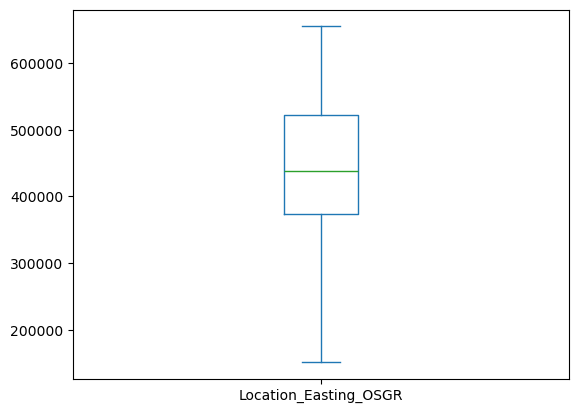

In [65]:
df_new.Location_Easting_OSGR.plot.box()

count     76406.000000
mean     300833.874553
std      158568.535134
min       12460.000000
25%      178580.000000
50%      274390.000000
75%      398920.000000
max      729430.000000
Name: Location_Northing_OSGR, dtype: float64


<Axes: >

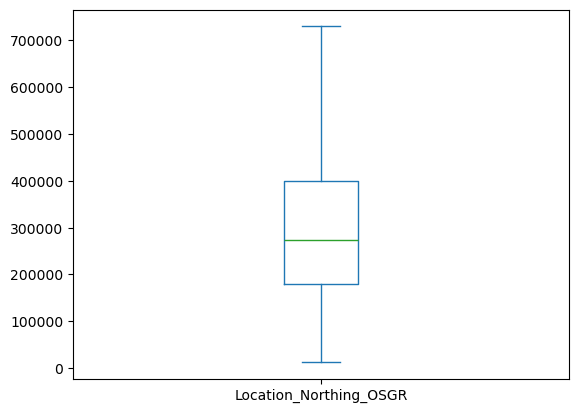

In [66]:
sutun_adi = "Location_Northing_OSGR"  # Aykırı değerleri düzenlemek istediğiniz sütun adı
df_new = aykiri_degerleri_duzelt(df_new, sutun_adi)

# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_new.to_csv("one_data.csv",index=False)

# Sonuçları kontrol etmek için:
print(df_new[sutun_adi].describe())
df_new.Location_Northing_OSGR.plot.box()

count    76406.000000
mean        -1.459925
std          1.401174
min         -5.638271
25%         -2.396694
50%         -1.427287
75%         -0.235642
max          1.758190
Name: Longitude, dtype: float64


<Axes: >

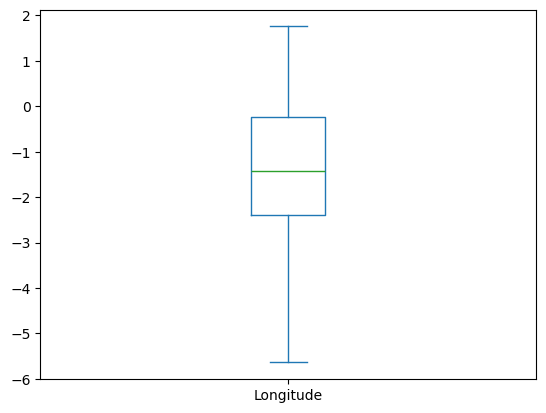

In [67]:
sutun_adi = "Longitude"  # Aykırı değerleri düzenlemek istediğiniz sütun adı
df_new = aykiri_degerleri_duzelt(df_new, sutun_adi)
# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_new.to_csv("one_data.csv",index=False)
# Sonuçları kontrol etmek için:
print(df_new[sutun_adi].describe())
df_new.Longitude .plot.box()

count    76406.000000
mean        52.595949
std          1.428870
min         49.967969
25%         51.493454
50%         52.357246
75%         53.485901
max         56.474572
Name: Latitude, dtype: float64


<Axes: >

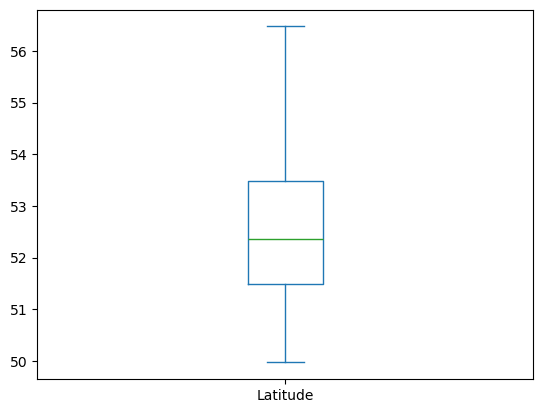

In [68]:
sutun_adi = "Latitude"  # Aykırı değerleri düzenlemek istediğiniz sütun adı
df_new = aykiri_degerleri_duzelt(df_new, sutun_adi)
# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_new.to_csv("one_data.csv",index=False)
# Sonuçları kontrol etmek için:
print(df_new[sutun_adi].describe())
df_new.Latitude.plot.box()

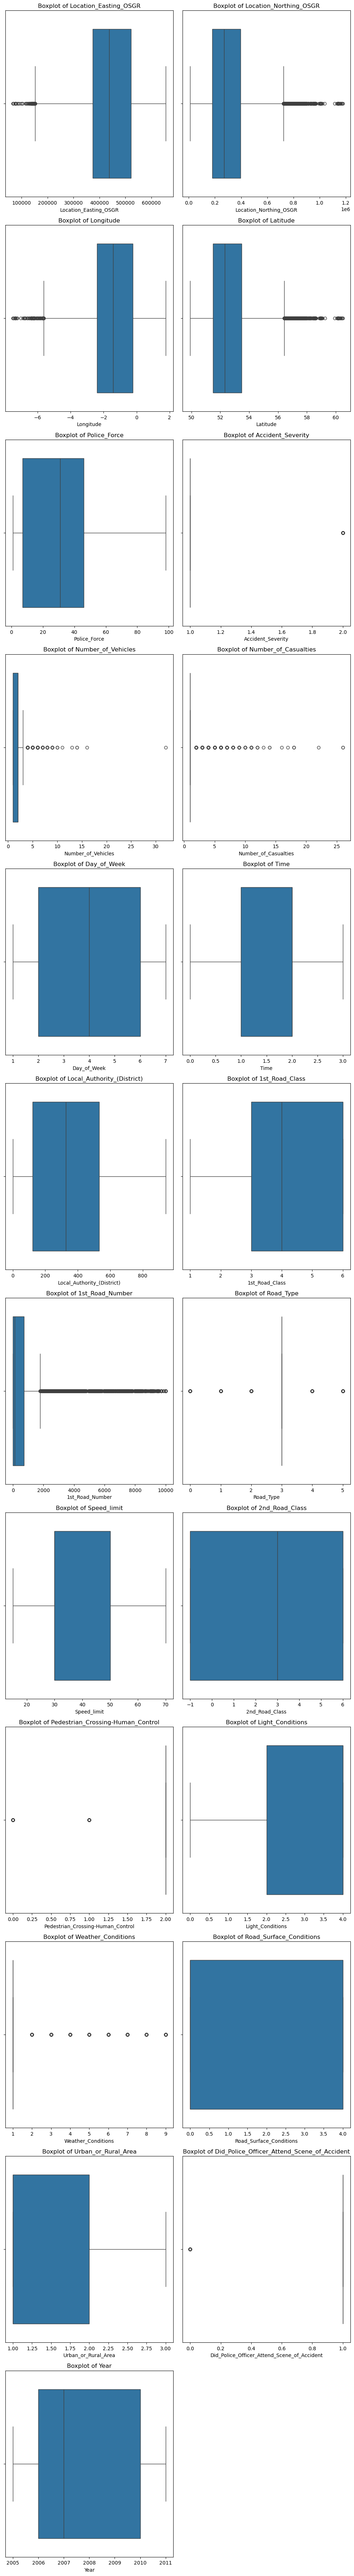

In [69]:
# Veri yükleme ve uyarı ayarları
df_new = pd.read_csv("one_data.csv")
import warnings
warnings.filterwarnings("ignore")

# Sayısal değişkenleri seçme
numeric_columns = df.select_dtypes(include="number").columns

# Satır ve sütun ayarları
columns_per_row = 2  # Bir satırdaki sütun sayısı
num_rows = int(np.ceil(len(numeric_columns) / columns_per_row))  # Gerekli satır sayısı

# Subplot'lar için figür boyutunu ayarlama
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(5 * columns_per_row, 6 * num_rows))

# Eksik eksenleri gizlemek için tüm eksenleri düz listeye çevirme
axes = axes.flatten()

# Her sayısal değişken için boxplot oluşturma
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Eksik kalan boş eksenleri gizleme
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Aykırı değer sayısı: 13528


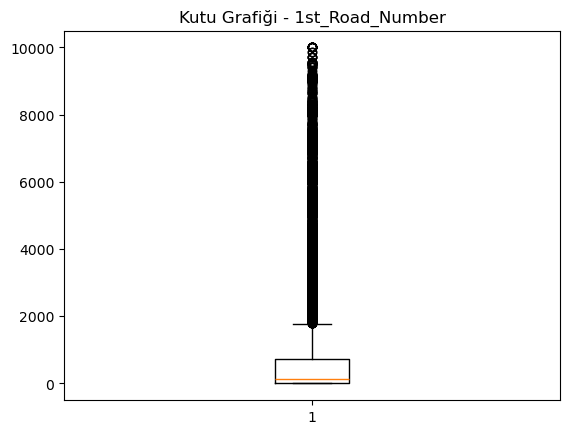

In [70]:

df_new = pd.read_csv("one_data.csv")  # Verinizi yükleyin

# Veri setinde ilgilenilen sütun (örneğin 'Accident_Severity' veya başka bir sütun)
column_name ='1st_Road_Number'

# Q1, Q3 ve IQR hesaplama
Q1 = df_new[column_name].quantile(0.25)
Q3 = df_new[column_name].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin sınırlarını hesaplayalım
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerin tespiti
outliers = df_new[(df_new[column_name] < lower_bound) | (df_new[column_name] > upper_bound)]

# Aykırı değerlerin sayısını yazdıralım
print(f"Aykırı değer sayısı: {len(outliers)}")

# Kutu grafiğini çizelim
plt.boxplot(df_new[column_name])
plt.title(f'Kutu Grafiği - {column_name}')
plt.show()

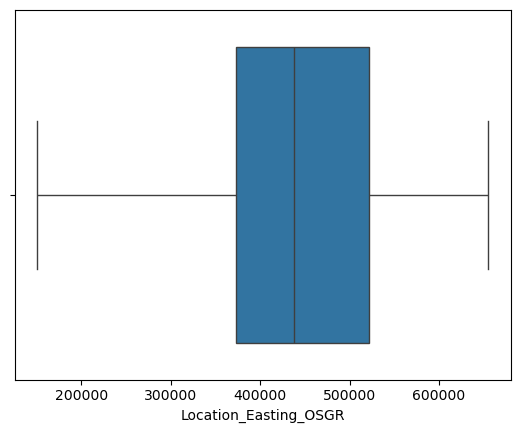

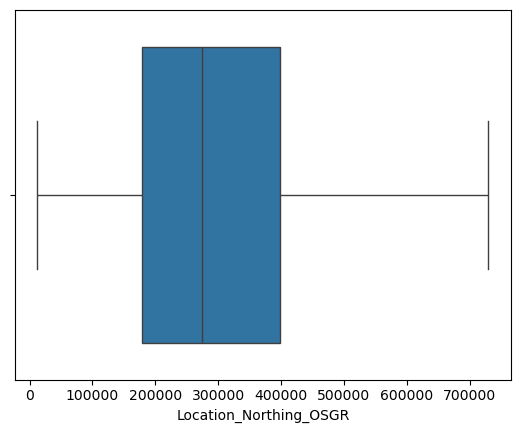

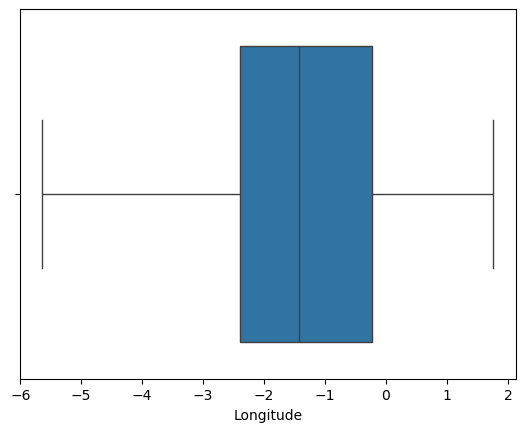

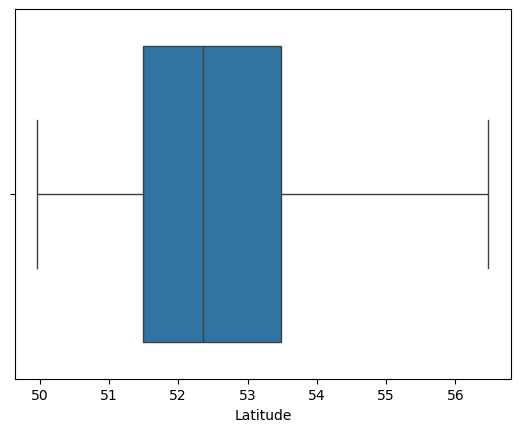

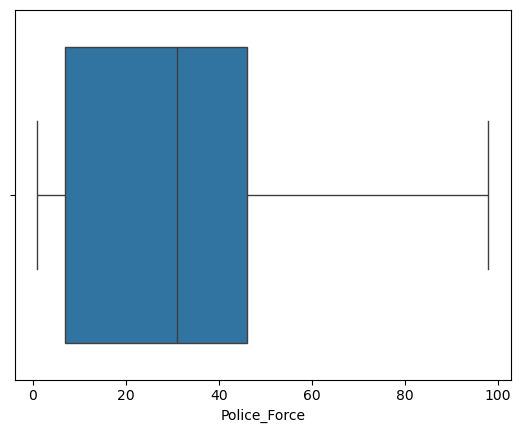

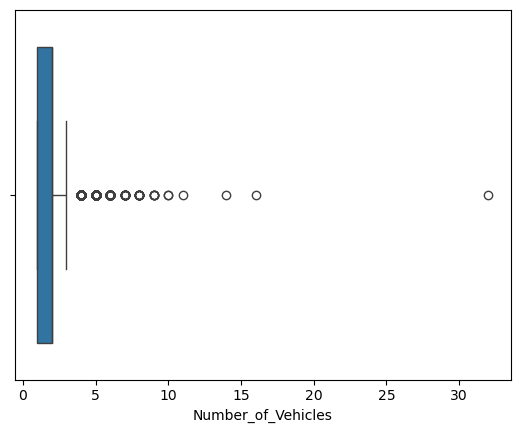

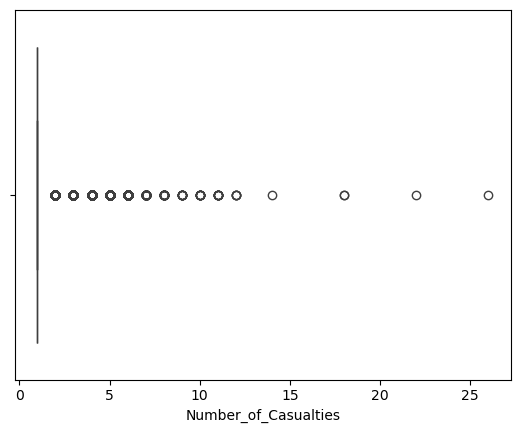

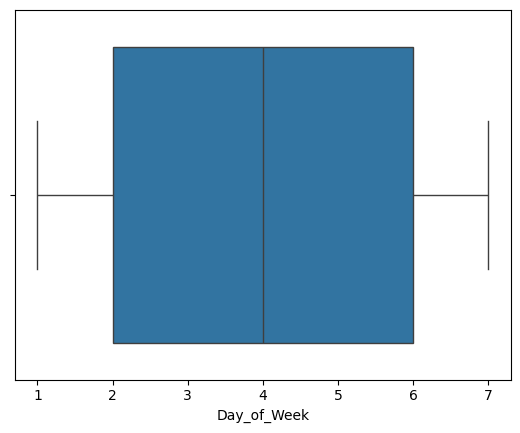

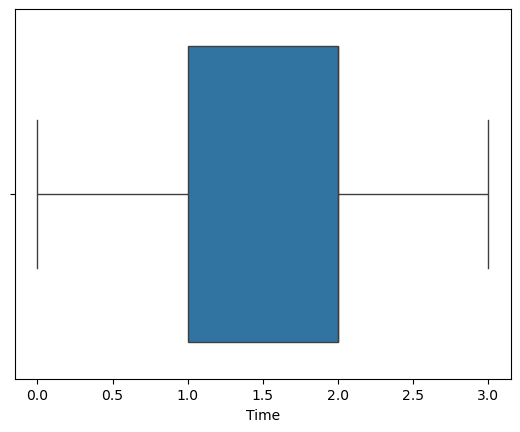

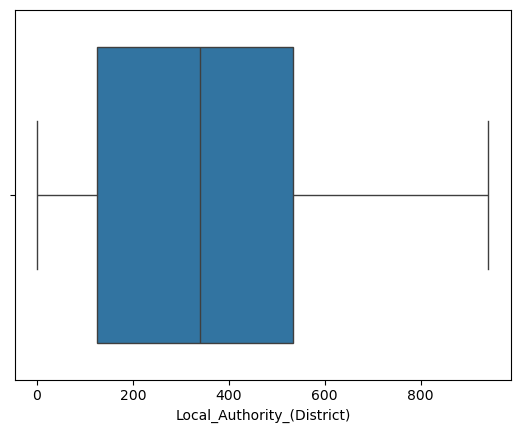

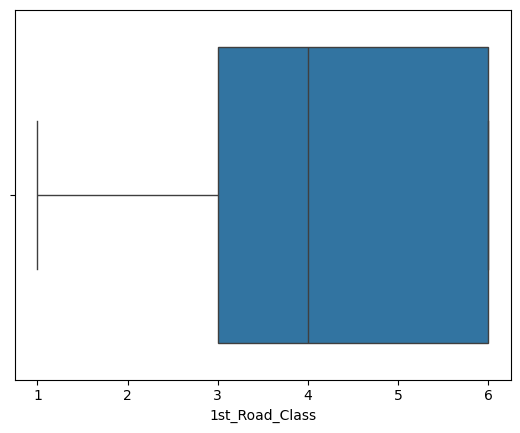

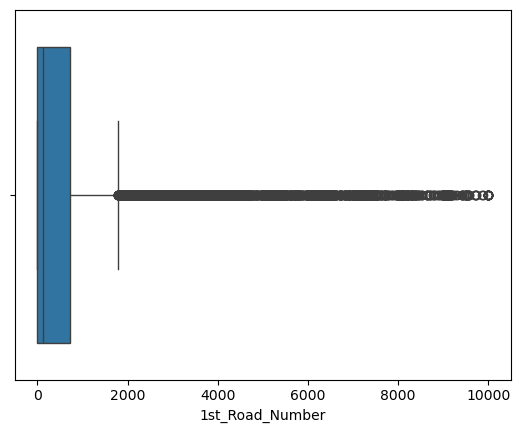

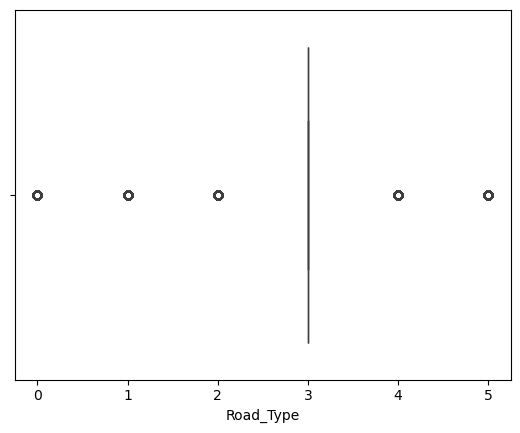

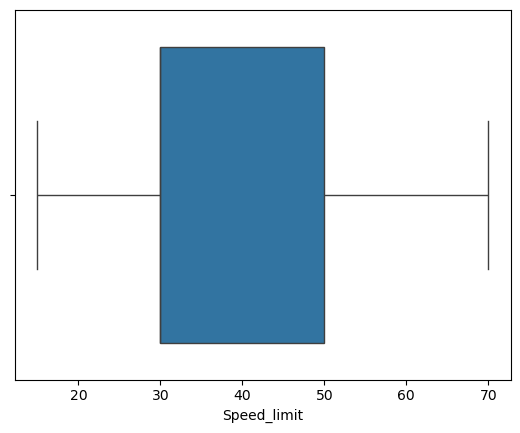

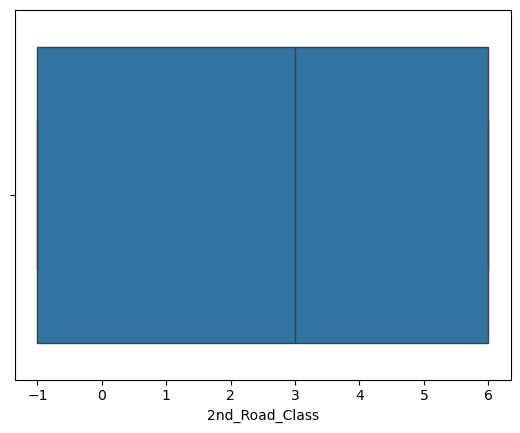

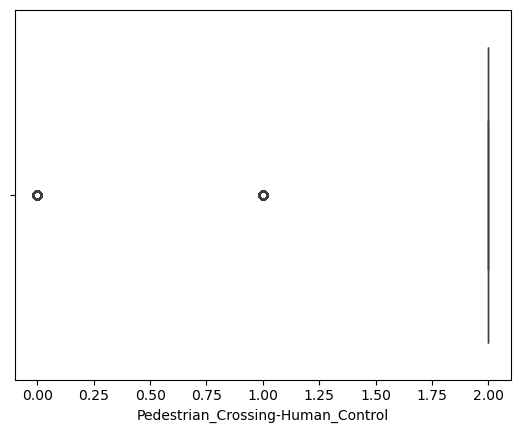

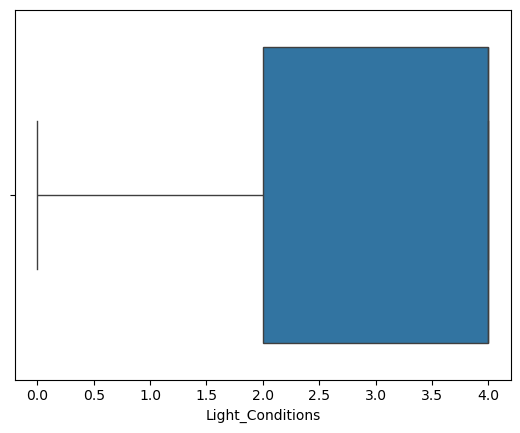

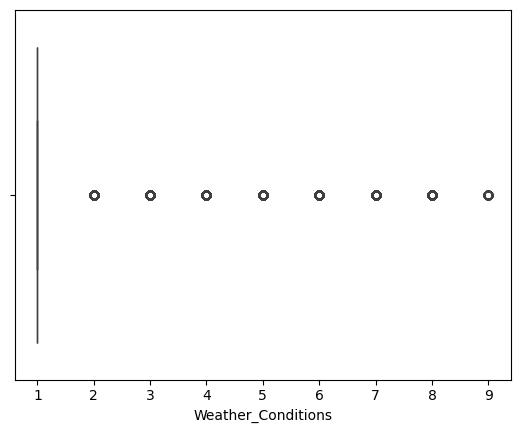

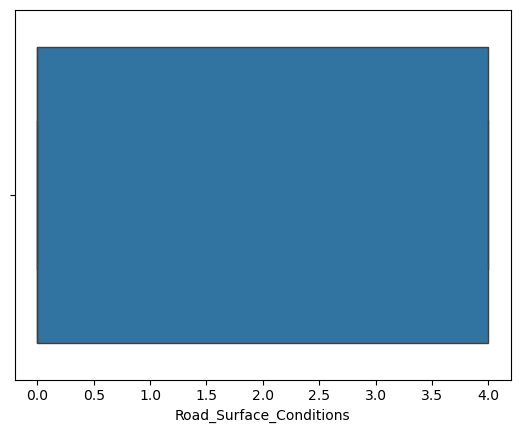

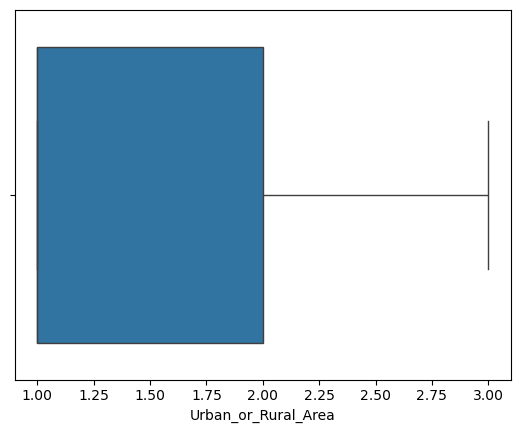

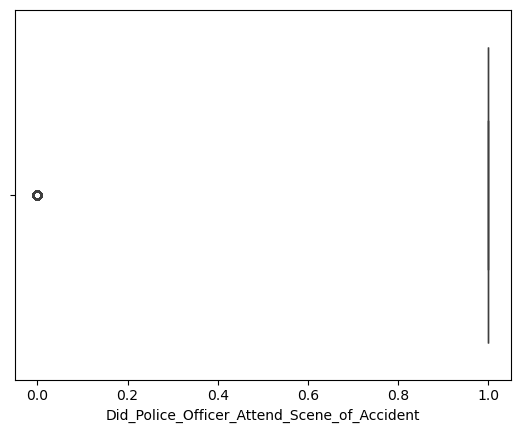

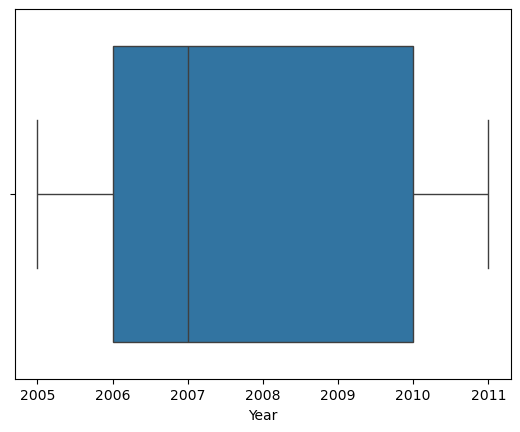

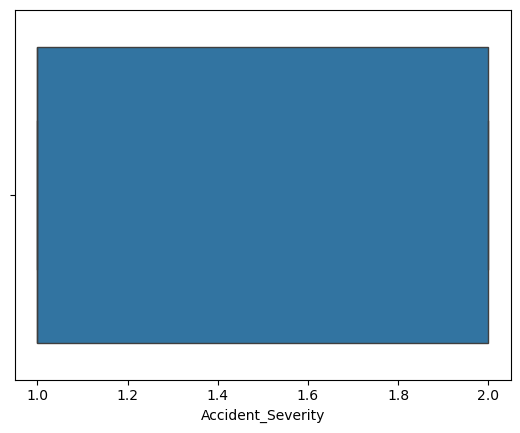

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("one_data.csv")
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

count    76406.000000
mean       503.410766
std        667.399801
min          0.000000
25%          0.000000
50%        133.500000
75%        714.000000
max       1785.000000
Name: 1st_Road_Number, dtype: float64


<Axes: >

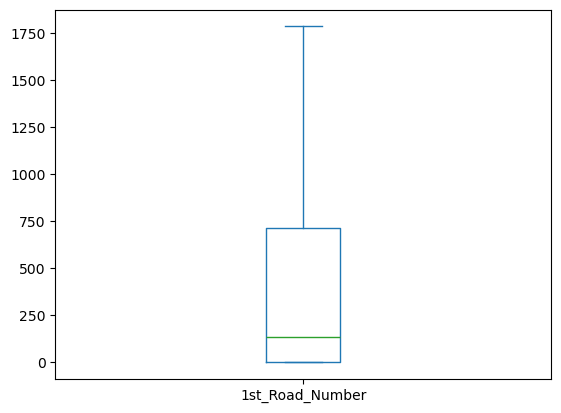

In [72]:
sutun_adi = "1st_Road_Number"  # Aykırı değerleri düzenlemek istediğiniz sütun adı
df_new = aykiri_degerleri_duzelt(df_new, sutun_adi)

# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_new.to_csv("one_data.csv", index=False)

# Sonuçları kontrol etmek için:
print(df_new[sutun_adi].describe())
df_new['1st_Road_Number'].plot.box()

count    76406.000000
mean         1.755641
std          0.640092
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.500000
Name: Number_of_Vehicles, dtype: float64


<Axes: >

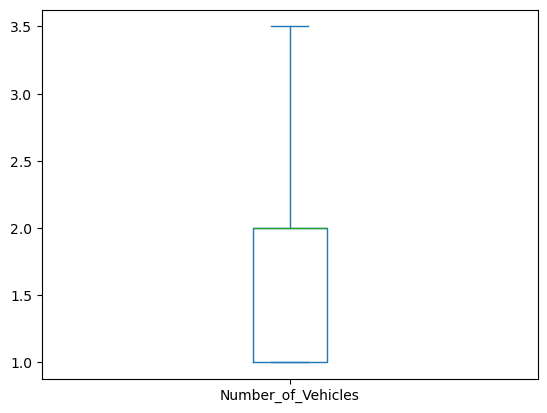

In [73]:
sutun_adi = "Number_of_Vehicles"  # Aykırı değerleri düzenlemek istediğiniz sütun adı
df_new = aykiri_degerleri_duzelt(df_new, sutun_adi)

# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_new.to_csv("one_data.csv", index=False)

# Sonuçları kontrol etmek için:
print(df_new[sutun_adi].describe())
df_new.Number_of_Vehicles.plot.box()

Location_Easting_OSGR                          0.001853
Location_Northing_OSGR                         0.038747
Longitude                                      0.000842
Latitude                                       0.038655
Police_Force                                   0.026995
Number_of_Vehicles                            -0.192989
Number_of_Casualties                           0.039702
Day_of_Week                                   -0.030667
Time                                          -0.048917
Local_Authority_(District)                     0.024279
1st_Road_Class                                -0.016645
1st_Road_Number                                0.008502
Road_Type                                      0.015027
Speed_limit                                    0.057614
2nd_Road_Class                                -0.071794
Pedestrian_Crossing-Human_Control             -0.004082
Light_Conditions                              -0.094770
Weather_Conditions                            -0

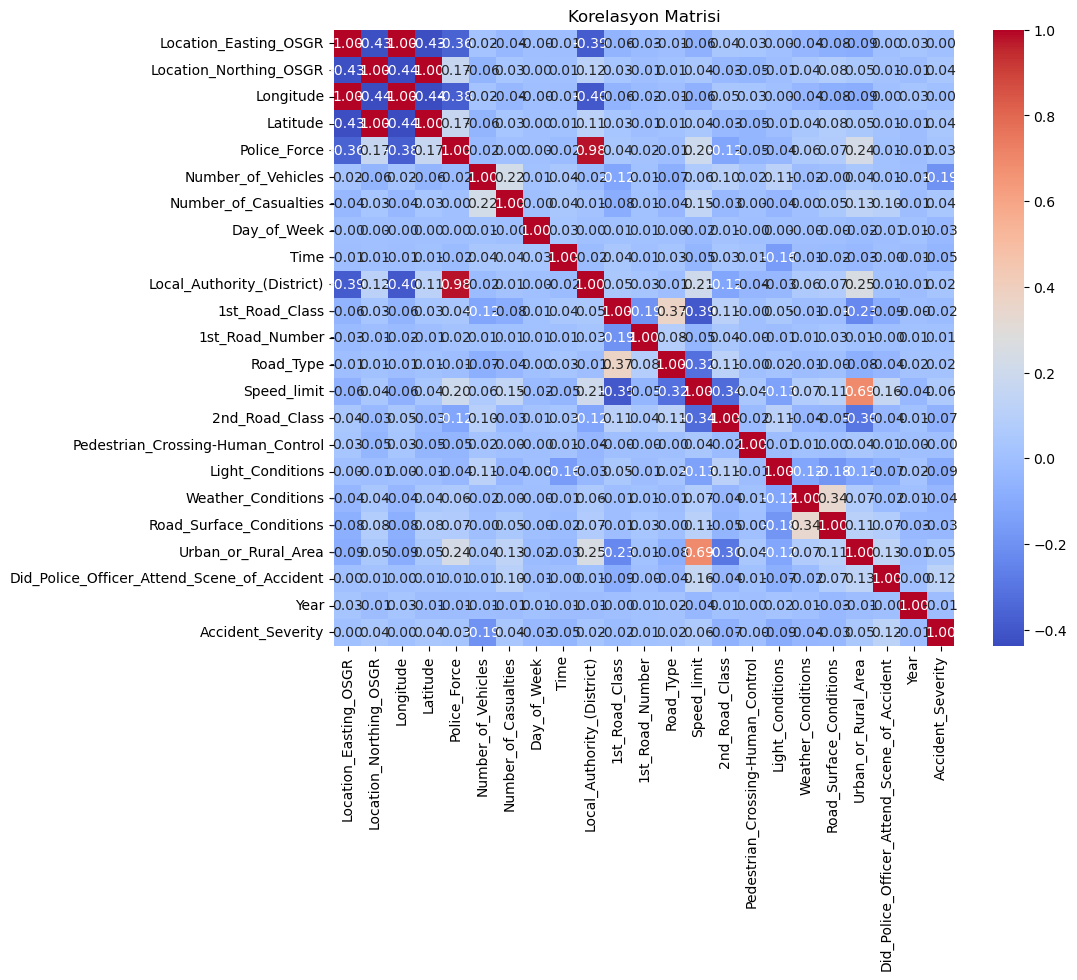

In [74]:
# Sayısal değişkenleri seç
numerical_cols = df_new.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Korelasyon matrisini hesapla
correlation_matrix = df_new[numerical_cols].corr()

# Hedef değişkenin diğer sayısal değişkenlerle olan korelasyonunu al
target_correlation = correlation_matrix['Accident_Severity']

# Sonuçları yazdır
print(target_correlation)

# Korelasyon matrisini ısı haritası olarak görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()
# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_new.to_csv("one_data.csv", index=False)

In [75]:
df_sonn= pd.read_csv("one_data.csv")

columns_to_drop = [
    'Number_of_Vehicles',
    'Day_of_Week',
    'Time',
    '1st_Road_Class',
    '2nd_Road_Class',
    'Light_Conditions',
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Year',
    'Longitude',
    'Pedestrian_Crossing-Human_Control'
]

# Sadece veri setinde bulunan sütunları kaldır
columns_to_drop = [col for col in columns_to_drop if col in df_sonn.columns]
df_sonn.drop(columns=columns_to_drop,inplace=True)
# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_sonn.to_csv("one_data.csv", index=False)

Location_Easting_OSGR                          0.001853
Location_Northing_OSGR                         0.038747
Latitude                                       0.038655
Police_Force                                   0.026995
Number_of_Casualties                           0.039702
Local_Authority_(District)                     0.024279
1st_Road_Number                                0.008502
Road_Type                                      0.015027
Speed_limit                                    0.057614
Urban_or_Rural_Area                            0.045485
Did_Police_Officer_Attend_Scene_of_Accident    0.120640
Accident_Severity                              1.000000
Name: Accident_Severity, dtype: float64


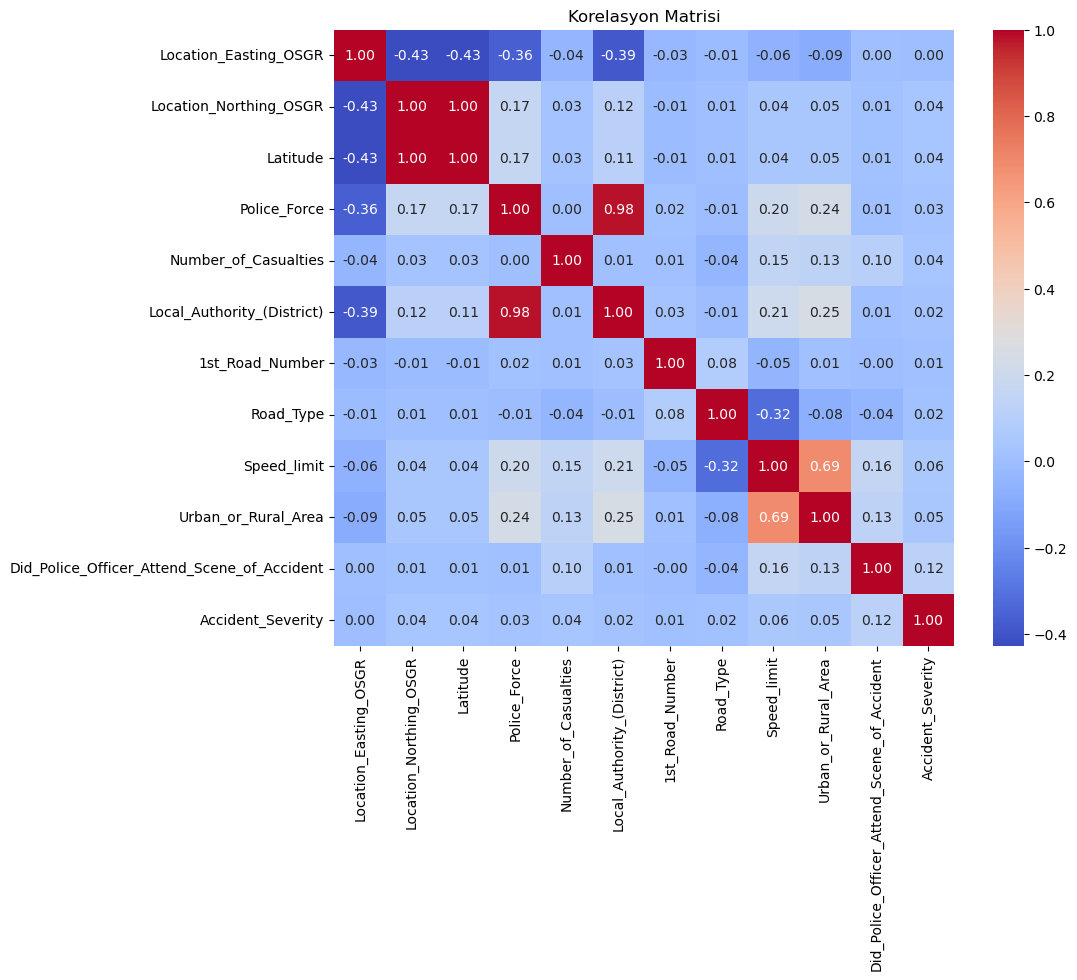

In [76]:
# Sayısal değişkenleri seç
numerical_cols = df_sonn.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Korelasyon matrisini hesapla
correlation_matrix = df_sonn[numerical_cols].corr()

# Hedef değişkenin diğer sayısal değişkenlerle olan korelasyonunu al
target_correlation = correlation_matrix['Accident_Severity']

# Sonuçları yazdır
print(target_correlation)

# Korelasyon matrisini ısı haritası olarak görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()
# Düzenlenmiş veriyi eski dosyanın üzerine kaydet
df_sonn.to_csv("one_data.csv", index=False)

In [77]:
df_sonn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76406 entries, 0 to 76405
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        76406 non-null  float64
 1   Location_Northing_OSGR                       76406 non-null  float64
 2   Latitude                                     76406 non-null  float64
 3   Police_Force                                 76406 non-null  int64  
 4   Number_of_Casualties                         76406 non-null  int64  
 5   Local_Authority_(District)                   76406 non-null  int64  
 6   1st_Road_Number                              76406 non-null  float64
 7   Road_Type                                    76406 non-null  int64  
 8   Speed_limit                                  76406 non-null  int64  
 9   Urban_or_Rural_Area                          76406 non-null  int64  
 10